# read data and split data to test and train

In [1]:
import pandas as pd

train_test_data = pd.read_csv('train.csv')

In [2]:
display(train_test_data)

,User ID,Gender,Age,AnnualSalary,Purchased
0,1,Female,52,138000,1
1,2,Female,23,48000,0
2,3,Female,34,114500,0
3,4,Female,27,44500,0
4,5,Female,29,83000,0
...,...,...,...,...,...
895,896,Male,45,26000,1
896,897,Male,45,79000,0
897,898,Male,42,98500,1
898,899,Male,46,79000,1


## data format convert

In [3]:
trans_form = train_test_data['Gender']
trans_form = [1 if i == "Male" else 0 for i in trans_form]
trans_form

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [4]:
train_test_data["Gender"] = trans_form
display(train_test_data)

,User ID,Gender,Age,AnnualSalary,Purchased
0,1,0,52,138000,1
1,2,0,23,48000,0
2,3,0,34,114500,0
3,4,0,27,44500,0
4,5,0,29,83000,0
...,...,...,...,...,...
895,896,1,45,26000,1
896,897,1,45,79000,0
897,898,1,42,98500,1
898,899,1,46,79000,1


## split data

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

# train and test data
X_train, X_test, y_train, y_test = np.array(train_test_split(train_test_data[["Gender","Age","AnnualSalary"]], train_test_data["Purchased"], random_state=0))


/tmp/ipykernel_670/3840607097.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train, X_test, y_train, y_test = np.array(train_test_split(train_test_data[["Gender","Age","AnnualSalary"]], train_test_data["Purchased"], random_state=0))


In [6]:
display(X_train)
display(X_test)

,Gender,Age,AnnualSalary
505,0,42,81500
210,0,48,50500
655,1,60,42000
50,1,25,22000
674,0,41,73500
...,...,...,...
835,1,22,18000
192,0,40,64500
629,1,25,59500
559,0,29,60500


,Gender,Age,AnnualSalary
492,1,38,145500
141,1,36,118000
409,1,27,33500
31,1,47,60500
570,1,47,118500
...,...,...,...
319,1,40,55500
18,1,49,90500
425,1,49,91500
156,0,46,22000


# construct model

## knn model

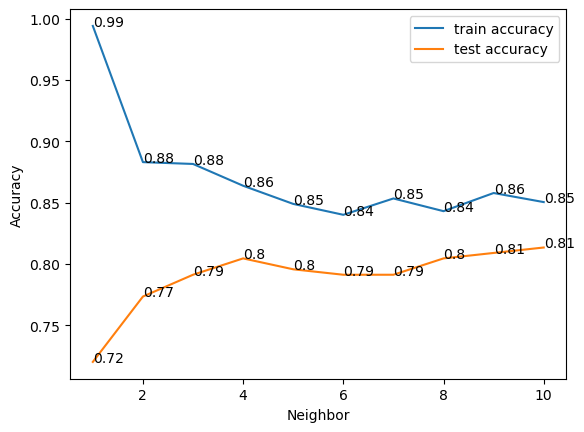

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
neighbors = range(1,11)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    knn.score(X_test,y_test)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.plot(neighbors, train_accuracy, label='train accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
for i,j in zip(neighbors, train_accuracy):
    plt.text(i,j,round(j,2))
for i,j in zip(neighbors, test_accuracy):
    plt.text(i,j,round(j,2))
plt.xlabel("Neighbor")
plt.ylabel("Accuracy")
plt.legend()

## LogisticRegression (although its name include Regression, it is a classified algorithm)

In [8]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression(C=10).fit(X_train, y_train)
print(logis.score(X_train, y_train))
logis.score(X_test, y_test)

0.6044444444444445


0.6266666666666667

## linear support vector machine (SVC)

In [9]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(C=10).fit(X_train,y_train)
print(linear_svm.score(X_train,y_train))
print(linear_svm.score(X_test,y_test))

0.6044444444444445
0.6266666666666667


/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## decision tree

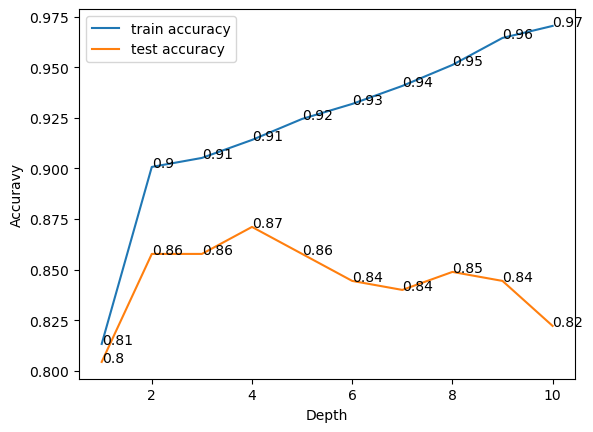

In [22]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
depth = range(1,11)

for num in depth:
    tree = DecisionTreeClassifier(max_depth=num, random_state=0)
    tree.fit(X_train,y_train)
    train_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test,y_test))
    
plt.plot(depth, train_accuracy, label="train accuracy")
plt.plot(depth, test_accuracy, label='test accuracy')
for i,j in zip(depth, train_accuracy):
    plt.text(i,j,round(j,2))
for i,j in zip(depth, test_accuracy):
    plt.text(i,j,round(j,2))
plt.xlabel("Depth")
plt.ylabel("Accuravy")
plt.legend()

In [11]:
tree.feature_importances_

array([0.00932636, 0.49740882, 0.49326482])

# Random forest

Text(0, 0.5, 'Accuracy')

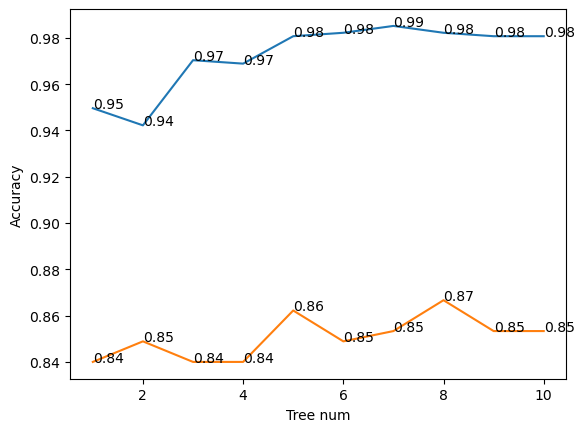

In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy =[]
forests = range(1,11)

for num in forests:
    forest = RandomForestClassifier(n_estimators=num, random_state=0)
    forest.fit(X_train, y_train)
    train_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(forests, train_accuracy, label="train accuracy")
plt.plot(forests, test_accuracy, label="test accuracy")
for i,j in zip(forests, train_accuracy):
    plt.text(i,j,round(j,2))
for i,j in zip(forests, test_accuracy):
    plt.text(i,j,round(j,2))
plt.xlabel("Tree num")
plt.ylabel("Accuracy")


# Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))
print(gbrt.predict_proba(X_test[:11]))

0.9081481481481481
0.8933333333333333
[[0.28825567 0.71174433]
 [0.28825567 0.71174433]
 [0.82702981 0.17297019]
 [0.37698613 0.62301387]
 [0.33825873 0.66174127]
 [0.82702981 0.17297019]
 [0.82702981 0.17297019]
 [0.82702981 0.17297019]
 [0.82702981 0.17297019]
 [0.82702981 0.17297019]
 [0.82702981 0.17297019]]


# multilayer perceptron, MLP, need data scale

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.6044444444444445
0.6266666666666667


/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
# data scale (unsupervised learning)
from sklearn.preprocessing import MinMaxScaler

# x-min/max-min
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[200,200,200],random_state=0, alpha=1).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.914074074074074
0.9022222222222223


/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

stand = StandardScaler()
X_stand_train = stand.fit(X_train).transform(X_train)
X_stand_test = stand.fit(X_test).transform(X_test)

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100,100,100], random_state=0, alpha=1).fit(X_stand_train, y_train)
print(mlp.score(X_stand_train, y_train))
print(mlp.score(X_stand_test, y_test))

0.9318518518518518
0.9022222222222223


/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca_train = pca.fit(X_train).transform(X_train)
X_pca_test = pca.fit(X_test).transform(X_test)
X_pca_train

array([[ 8.64888899e+03,  1.60585738e+00, -4.50193100e-01],
       [-2.23511107e+04,  9.24551670e+00, -4.66706613e-01],
       [-3.08511100e+04,  2.16926886e+01,  5.53434656e-01],
       ...,
       [-1.33511119e+04, -1.42328357e+01,  4.87434163e-01],
       [-1.23511117e+04, -1.02833572e+01, -5.02038526e-01],
       [ 7.64888904e+03,  2.65636468e+00,  5.51192864e-01]])

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100,100,100], random_state=0).fit(X_pca_train, y_train)
print(mlp.score(X_pca_train,y_train))
print(mlp.score(X_pca_test,y_test))

0.8014814814814815
0.7911111111111111


/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
from sklearn.decomposition import NMF
from sklearn.neural_network import MLPClassifier

nmf = NMF(n_components=2, random_state=0)
X_nmf_train = nmf.fit(X_train).transform(X_train)
X_nmf_test = nmf.fit(X_test).transform(X_test)

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10,10], random_state=0,alpha=100).fit(X_nmf_train, y_train)
print(mlp.score(X_nmf_train, y_train))
print(mlp.score(X_nmf_test, y_test))

0.6044444444444445
0.6266666666666667


/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  w

# 流形学习算法（manifold learning algorithm）

In [21]:
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier

tsne = TSNE(random_state=0)
X_tsne_train = tsne.fit_transform(X_train)
X_tsne_test = tsne.fit_transform(X_test)

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100,100,100], random_state=42, alpha=10).fit(X_tsne_train, y_train)
print(mlp.score(X_tsne_train,y_train))
print(mlp.score(X_tsne_test, y_test))

/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.794074074074074
0.5644444444444444


/home/ouyangkang/software/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
